<a href="https://colab.research.google.com/github/Sanya505/BranchTest/blob/main/%D0%9C%D0%B0%D1%80%D1%82%D1%8B%D0%BD%D0%B5%D0%BD%D0%BA%D0%BE_%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_%E2%84%9618.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img src="https://u.foxford.ngcdn.ru/uploads/inner_file/file/138923/lect18.png"></p>

___

<font color="#AEBAC5">Основы Python и глубокого обучения</font>
<font color="#AEBAC5"> → </font>
<font color="#000000">Компьютерное зрение (CV)</font>
<font color="#AEBAC5"> → </font>
<font color="#AEBAC5">Обработка естественного языка (NLP)</font>

___

<h1><strong><font color="#FF732B">Влияние свертки на изображение</font></strong></h1>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!wget https://u.foxford.ngcdn.ru/uploads/inner_file/file/99527/Homework.png

--2024-02-01 13:40:50--  https://u.foxford.ngcdn.ru/uploads/inner_file/file/99527/Homework.png
Resolving u.foxford.ngcdn.ru (u.foxford.ngcdn.ru)... 104.20.157.54, 104.20.156.54, 2606:4700:10::6814:9d36, ...
Connecting to u.foxford.ngcdn.ru (u.foxford.ngcdn.ru)|104.20.157.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7404 (7.2K) [image/png]
Saving to: ‘Homework.png’

Homework.png        100%[===================>]   7.23K  --.-KB/s    in 0s      

2024-02-01 13:40:51 (43.4 MB/s) - ‘Homework.png’ saved [7404/7404]



Проверим картинку:

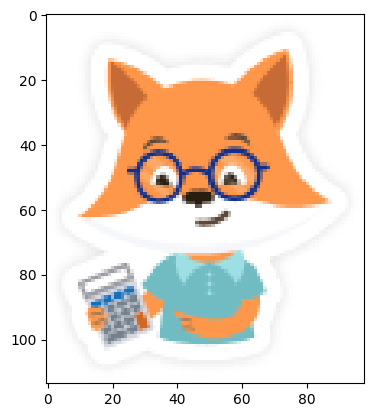

In [ ]:
img = plt.imread('./Homework.png')
plt.imshow(img)

<h3><strong><font color="#809BFF">Задача №1</font></strong></h3>
Заготовим ядро для свертки( оно же будет нашим фильтром).


In [ ]:
img.shape


(114, 98, 4)

In [ ]:
#место для кода
kernel1 = [
    [-1,0,1,1],
    [-1,0,1,1],
    [-1,0,1,1]
]

<h1><strong><font color="#FF732B">Важные моменты</font></strong></h1>

<p><img src="https://u.foxford.ngcdn.ru/uploads/inner_file/file/139029/pad1.png"></p>

<p><img src="https://u.foxford.ngcdn.ru/uploads/inner_file/file/139030/pad2.png"></p>

<p><img src="https://u.foxford.ngcdn.ru/uploads/inner_file/file/139031/pad3.png"></p>

<p><img src="https://u.foxford.ngcdn.ru/uploads/inner_file/file/139033/pad5.png"></p>

<p><img src="https://u.foxford.ngcdn.ru/uploads/inner_file/file/139027/str1.png"></p>

<p><img src="https://u.foxford.ngcdn.ru/uploads/inner_file/file/139028/str2.png"></p>

<h3><strong><font color="#809BFF">Задача №2</font></strong></h3>
Напиши, как можно выполнить свертку (хотя бы самую простую)

In [ ]:
# Важно, чтобы число каналов изображения и свертки были одинаковыми

In [ ]:
#место для кода
def convol(img,kernel,stride=1):
# дублируем ось каналов
  kernel = np.array(kernel)[:,:, np.newaxis]
  tensor = np.tile(kernel,(1,1, img.shape[2]))
  shape = tensor.shape
# здесь храним результаты
  result = np.zeros((img.shape[0], img.shape[1]))
  row_border = tensor.shape[0]//2
  col_border = tensor.shape[1]//2
# цикл свертки с шагами по оси x и Y
  step_i = 0
  for i in range (0, img.shape[0]-shape[0] + 1, stride):
    step_j = 0
    for j in range (0, img.shape[1] -shape[1] +1, stride):
#здесь свернули
      convol_final = np.sum (tensor *img[i:i+shape[0], j:j+shape[1], :])
#здесь поставили значения пикселей
      convol_final = np.clip(convol_final, 0 ,255)
#записываем итог
      result[step_i, step_j] = convol_final
      step_j +=1
    step_i +=1
  return result.astype('int16') # -чтобы пиксели были целыми

<h3><strong><font color="#809BFF">Задача №3</font></strong></h3>
Отобрази результат применения фильтра ниже.

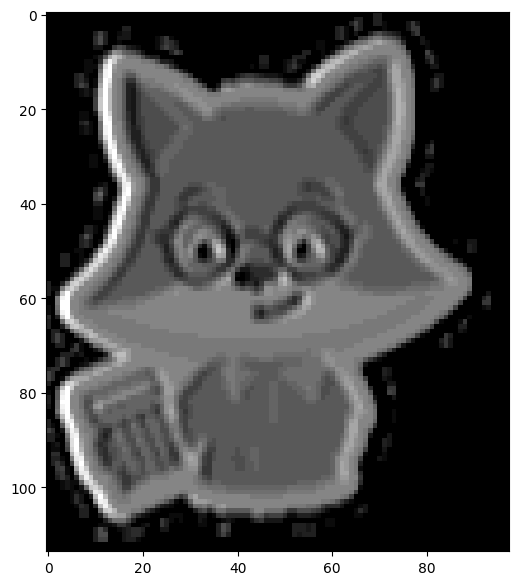

In [ ]:
#место для кода
CNN_1 = convol(img, kernel1, stride=1)

plt.figure(figsize=(7,7))
plt.imshow(CNN_1,cmap='gray')

<h3><strong><font color="#809BFF">Задача №4</font></strong></h3>
Поменяй фильтр и проверь, что произойдет.

In [ ]:
#место для кода


<h3><strong><font color="#809BFF">Задача №5</font></strong></h3>
Посмотрим, что получилось теперь.

In [ ]:
#место для кода


<h3><strong><font color="#809BFF">Задача №6</font></strong></h3>
Попробуем сделать более яркими и четкими белые линии! Как это сделать? Чтобы понять это, присмотрись, в свои фильтры. Там есть некая закономерность.

In [ ]:
#место для кода


<p><img src="https://u.foxford.ngcdn.ru/uploads/inner_file/file/107344/hmmmmm.png" width = 12%></p>

<h3><strong><font color="#809BFF">Задача №7</font></strong></h3>
Попробуй поиграть с фильтрами: 1. Измени ядро, так чтобы края были более выделенными. 2. Сделай изображение более резким. 3.Сделай резкость более четкой, увеличив ядро. 4. Сделай размытие картинки.

<h1><strong><font color="#FC4262">Домашняя работа</font></strong></h1>

Вот несколько шагов, чтобы настроить удобную работу над домашними задачами:

1. В сервисе [Google Drive](https://www.google.com/intl/ru/drive/) создай папку `foxford_ds_study` (если еще этого не сделал), в которой ты будешь хранить все учебные материалы с этого курса.
2. Сохрани копию этой тетрадки `Лекция №18.ipynb` *(File → Save a copy in Drive)* в папку `foxford_ds_study`.

Зачем это нужно?

Файл, в котором работает преподаватель — это «оригинальный» файл и мы не можем работать в нем все вместе, ведь у каждого свой код! Каждому ученику необходимо сделать свою копию файла и выполнять домашку именно в ней. Если хочешь, ты можешь назвать свой файл по имени, например, `Лекция №18 Иван Кнопочкин.ipynb`.

В начале следующей лекции мы обсудим эти задачи вместе.

<h3><strong><font color="#809BFF">Задача №8</font></strong></h3>

Закомментируй код преподавателя из всех заданий, которые были на занятии.